In [1]:
!unzip data.zip

Archive:  data.zip
  inflating: student-mat.csv         


In [10]:
# ## 1. Setup and Imports
# 필요한 라이브러리를 모두 불러옵니다.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 경고 메시지 무시
import warnings
warnings.filterwarnings('ignore')

# ---

# ## 2. Data Loading and Initial Exploration
# 학생 성적 데이터셋을 로드하고 기본적인 정보를 확인합니다.
try:
    df = pd.read_csv("student.csv")
    print("Dataset loaded successfully.")
    print(f"Dataset shape: {df.shape}")
except FileNotFoundError:
    print("Error: 'student_scores.csv' not found. Please check the file path.")
    df = pd.DataFrame()

Dataset loaded successfully.
Dataset shape: (395, 33)


In [4]:
print("\nFirst 5 rows of the dataset:")
print(df.head())


First 5 rows of the dataset:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


In [5]:
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object


In [6]:
print("\nStatistical Summary:")
print(df.describe())


Statistical Summary:
              age        Medu        Fedu  traveltime   studytime    failures  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    16.696203    2.749367    2.521519    1.448101    2.035443    0.334177   
std      1.276043    1.094735    1.088201    0.697505    0.839240    0.743651   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     3.944304    3.235443    3.108861    1.481013    2.291139    3.554430   
std  

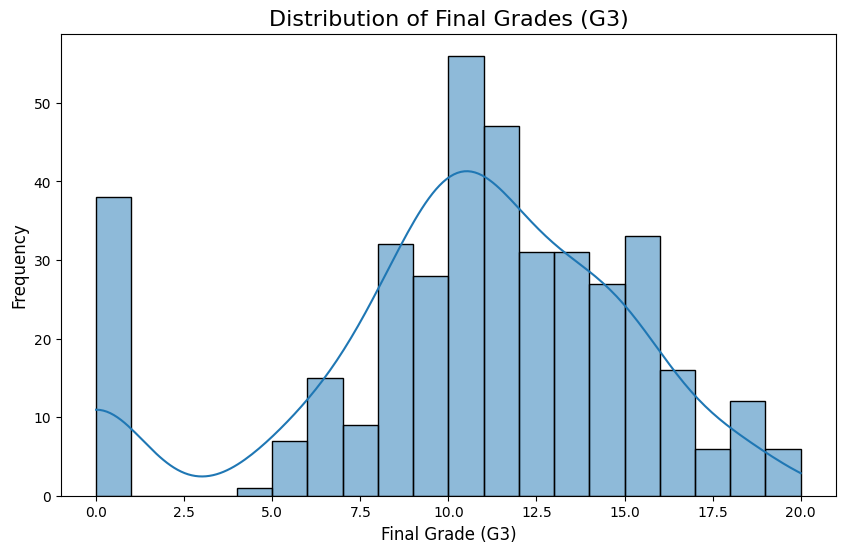

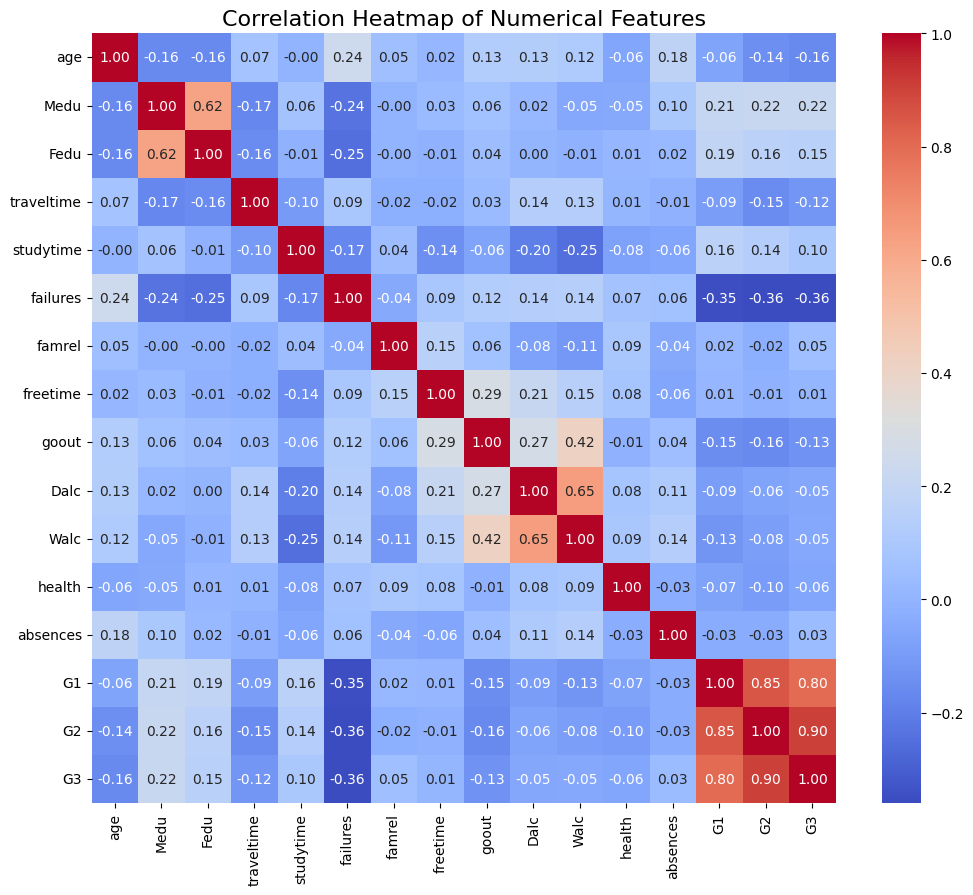

/tmp/ipython-input-2037454561.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 1].set_xticklabels(['<2 hrs', '2-5 hrs', '5-10 hrs', '>10 hrs'])


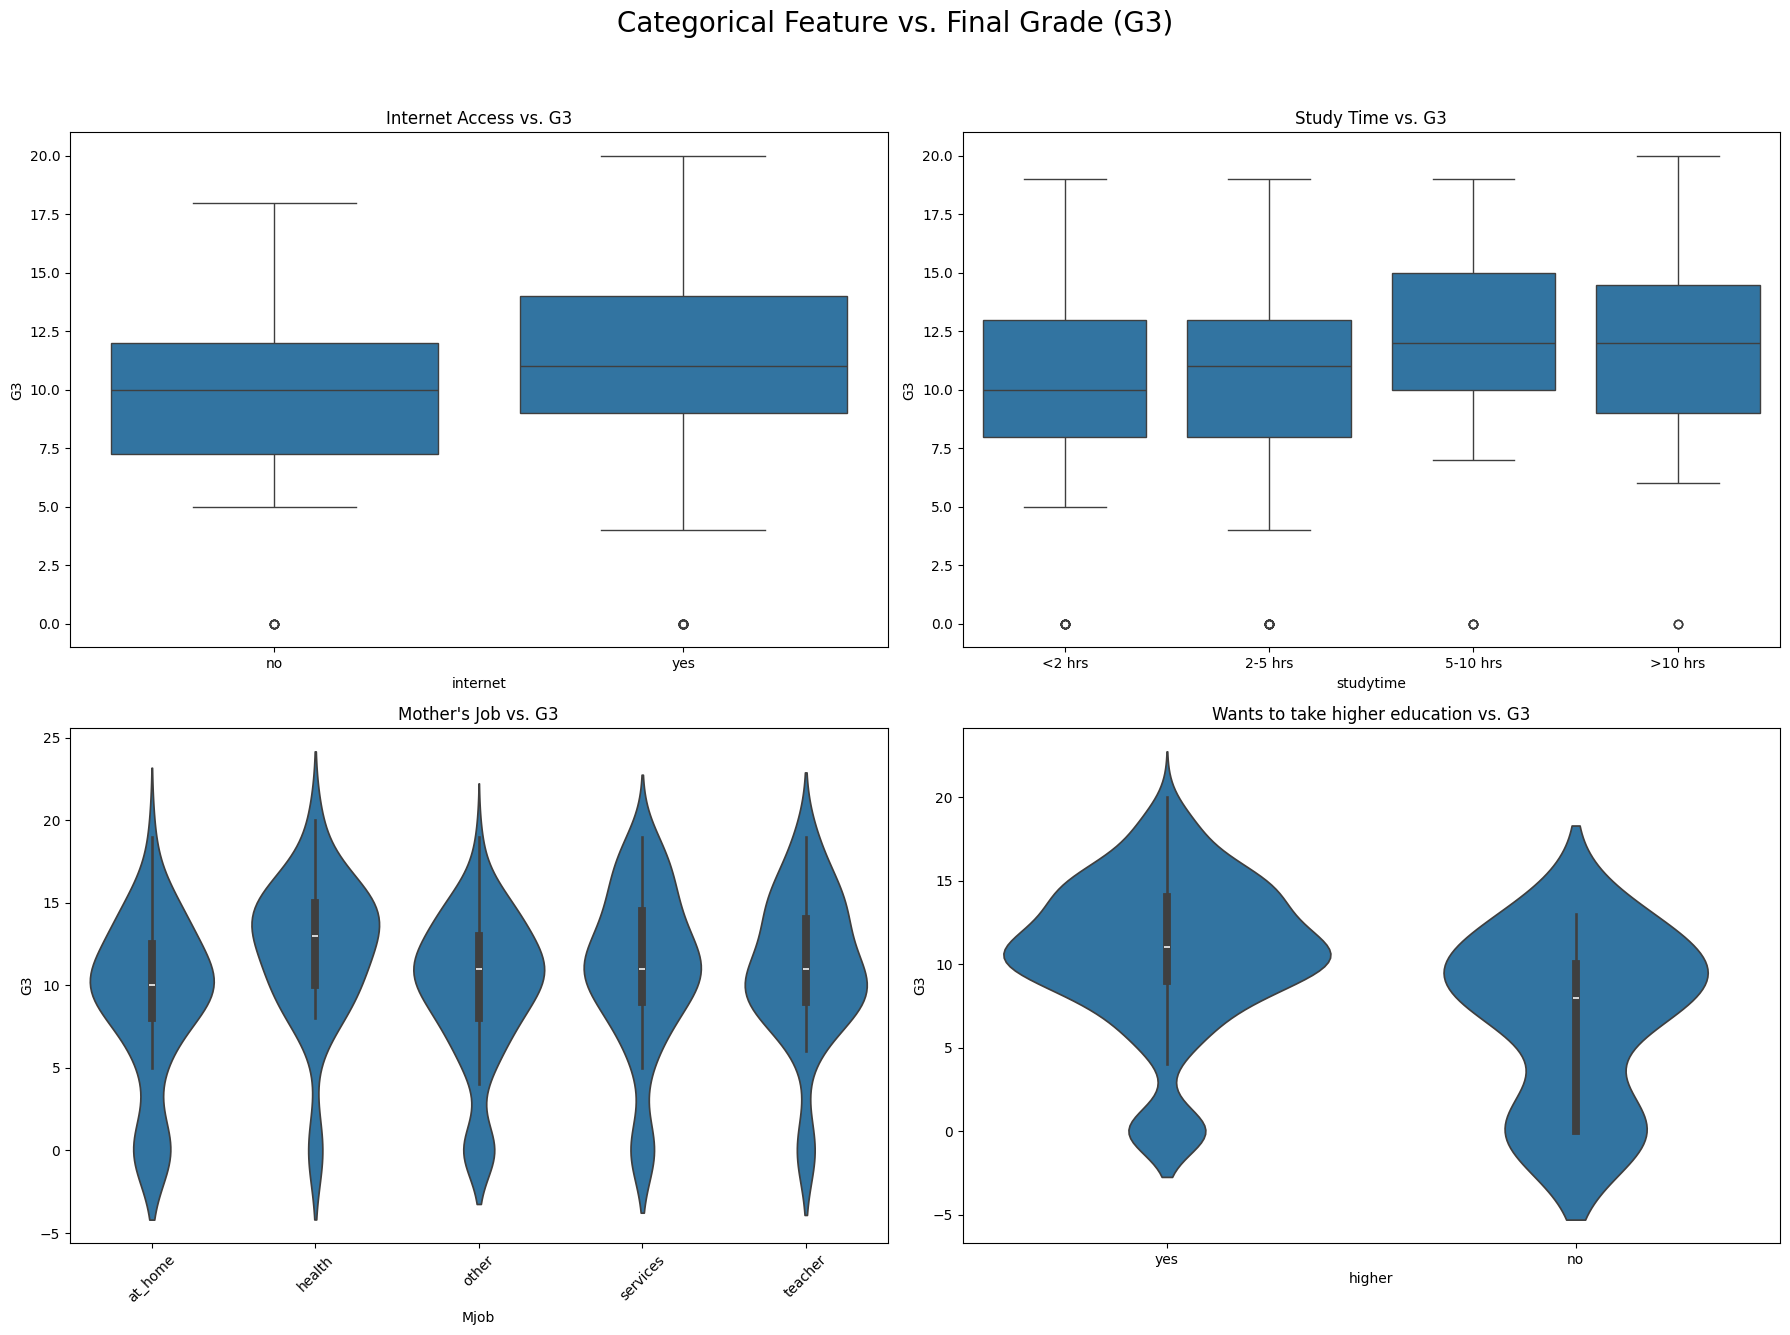

In [8]:
# ## 3. Exploratory Data Analysis (EDA)
# 데이터의 특징과 변수 간의 관계를 시각적으로 탐색합니다.
if not df.empty:
    # 타겟 변수(G3)의 분포 확인
    plt.figure(figsize=(10, 6))
    sns.histplot(df['G3'], kde=True, bins=20)
    plt.title('Distribution of Final Grades (G3)', fontsize=16)
    plt.xlabel('Final Grade (G3)', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.show()

    # 수치형 데이터 간의 상관관계 히트맵
    plt.figure(figsize=(12, 10))
    # 'object' 타입을 제외한 숫자형 데이터만 선택
    numerical_df = df.select_dtypes(include=np.number)
    sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Heatmap of Numerical Features', fontsize=16)
    plt.show()

    # 주요 범주형 변수와 최종 성적(G3) 간의 관계 시각화
    fig, axes = plt.subplots(2, 2, figsize=(18, 14))
    fig.suptitle('Categorical Feature vs. Final Grade (G3)', fontsize=20)

    sns.boxplot(ax=axes[0, 0], data=df, x='internet', y='G3')
    axes[0, 0].set_title('Internet Access vs. G3')

    sns.boxplot(ax=axes[0, 1], data=df, x='studytime', y='G3')
    axes[0, 1].set_title('Study Time vs. G3')
    axes[0, 1].set_xticklabels(['<2 hrs', '2-5 hrs', '5-10 hrs', '>10 hrs'])

    sns.violinplot(ax=axes[1, 0], data=df, x='Mjob', y='G3')
    axes[1, 0].set_title('Mother\'s Job vs. G3')
    axes[1, 0].tick_params(axis='x', rotation=45)

    sns.violinplot(ax=axes[1, 1], data=df, x='higher', y='G3')
    axes[1, 1].set_title('Wants to take higher education vs. G3')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

In [11]:
# ## 4. Feature Engineering and Preprocessing
# 모델 학습을 위해 데이터를 준비합니다.
if not df.empty:
    # 독립 변수(X)와 종속 변수(y) 분리
    X = df.drop('G3', axis=1)
    y = df['G3']

    # 수치형 변수와 범주형 변수 식별
    numerical_features = X.select_dtypes(include=np.number).columns
    categorical_features = X.select_dtypes(include='object').columns

    # 전처리 파이프라인 생성
    # 수치형 변수: StandardScaler로 스케일링
    # 범주형 변수: OneHotEncoder로 인코딩
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numerical_features),
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
        ])

    # 훈련/테스트 데이터 분할
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    print(f"\nTraining data shape: {X_train.shape}")
    print(f"Test data shape: {X_test.shape}")


Training data shape: (316, 32)
Test data shape: (79, 32)


In [12]:
# ## 5. Model Training and Comparison
# 여러 회귀 모델을 학습시키고 성능을 비교합니다.
if not df.empty:
    models = {
        "Linear Regression": LinearRegression(),
        "Random Forest": RandomForestRegressor(random_state=42),
        "Gradient Boosting": GradientBoostingRegressor(random_state=42)
    }

    results = {}

    for name, model in models.items():
        print(f"\n--- Training {name} ---")

        # 모델과 전처리기를 파이프라인으로 결합
        pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                   ('regressor', model)])

        # 모델 학습
        pipeline.fit(X_train, y_train)

        # 예측
        y_pred = pipeline.predict(X_test)

        # 성능 평가
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        results[name] = {'MSE': mse, 'R2 Score': r2}
        print(f"Mean Squared Error (MSE): {mse:.2f}")
        print(f"R2 Score: {r2:.2f}")

    # 성능 비교 결과 출력
    results_df = pd.DataFrame(results).T
    print("\n--- Model Performance Comparison ---")
    print(results_df)


--- Training Linear Regression ---
Mean Squared Error (MSE): 5.66
R2 Score: 0.72

--- Training Random Forest ---
Mean Squared Error (MSE): 4.04
R2 Score: 0.80

--- Training Gradient Boosting ---
Mean Squared Error (MSE): 3.93
R2 Score: 0.81

--- Model Performance Comparison ---
                        MSE  R2 Score
Linear Regression  5.656643  0.724134
Random Forest      4.035386  0.803200
Gradient Boosting  3.931781  0.808253



--- Analysis of the Best Model: Gradient Boosting ---


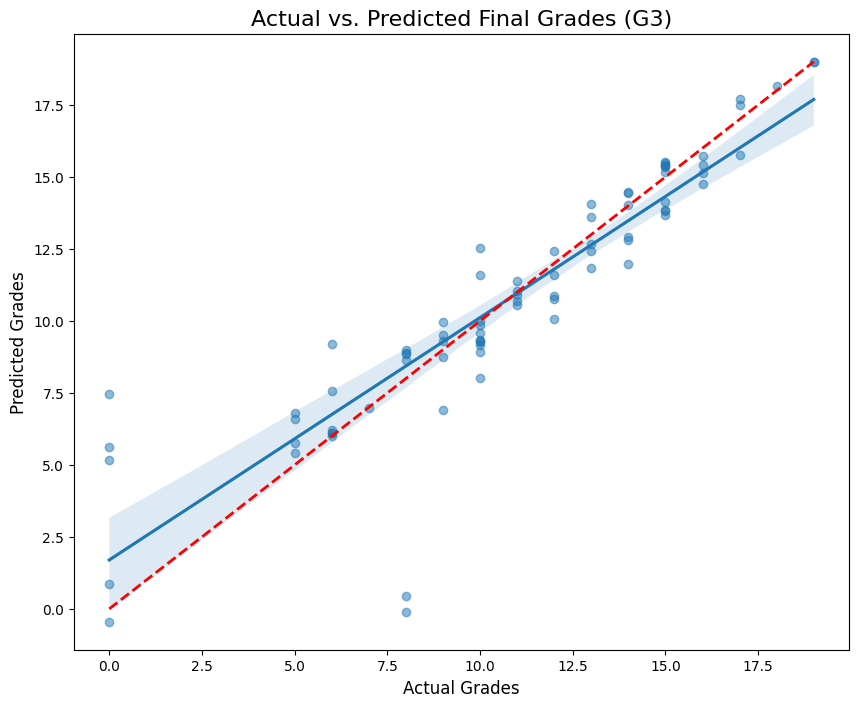

In [13]:
# ## 6. Results Analysis
# 가장 성능이 좋은 모델의 예측 결과를 심층 분석합니다.
# 가장 성능이 좋은 모델 선택 (R2 Score 기준)
best_model_name = results_df['R2 Score'].idxmax()
best_model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                        ('regressor', models[best_model_name])])
best_model_pipeline.fit(X_train, y_train)
y_pred_best = best_model_pipeline.predict(X_test)

print(f"\n--- Analysis of the Best Model: {best_model_name} ---")

# 실제 값 vs 예측 값 비교 시각화
plt.figure(figsize=(10, 8))
sns.regplot(x=y_test, y=y_pred_best, scatter_kws={'alpha':0.5})
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', linewidth=2)
plt.title('Actual vs. Predicted Final Grades (G3)', fontsize=16)
plt.xlabel('Actual Grades', fontsize=12)
plt.ylabel('Predicted Grades', fontsize=12)
plt.show()

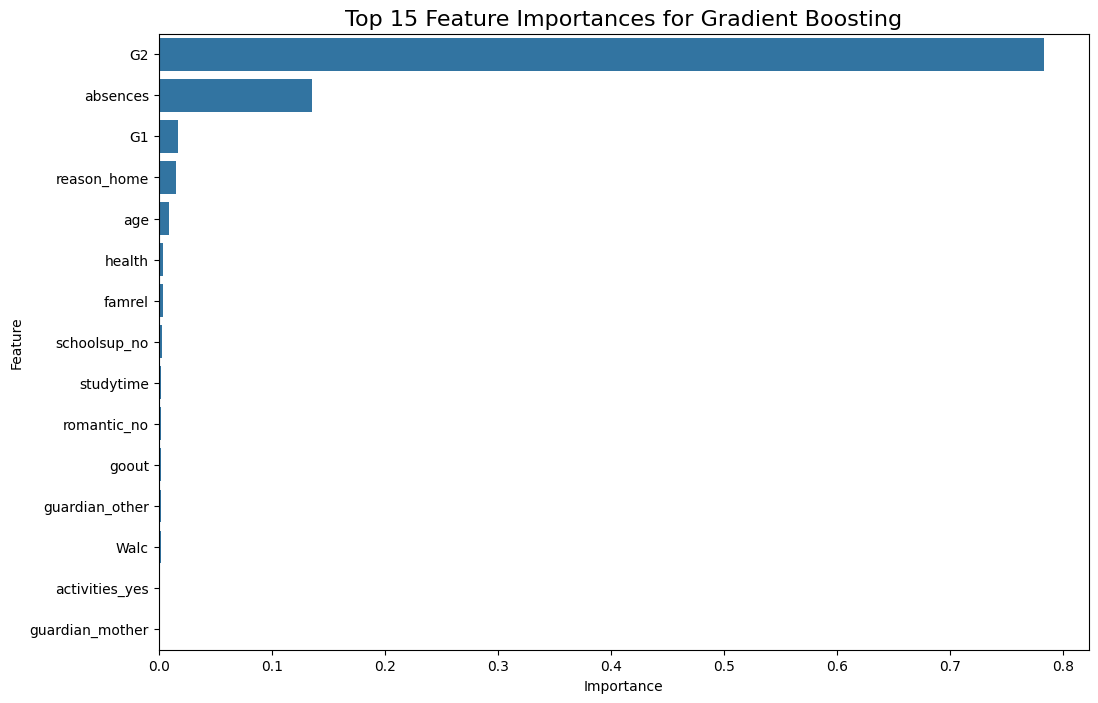

In [14]:
# 특성 중요도 분석 (Tree-based 모델인 경우)
if hasattr(models[best_model_name], 'feature_importances_'):
    # 전처리된 후의 특성 이름 가져오기
    try:
        feature_names = numerical_features.tolist() + \
                        best_model_pipeline.named_steps['preprocessor']\
                        .named_transformers_['cat'].get_feature_names_out(categorical_features).tolist()

        importances = models[best_model_name].feature_importances_

        feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
        feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

        # 상위 15개 특성만 시각화
        plt.figure(figsize=(12, 8))
        sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(15))
        plt.title(f'Top 15 Feature Importances for {best_model_name}', fontsize=16)
        plt.show()

    except Exception as e:
        print(f"Could not plot feature importances: {e}")